In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [2]:
path4 = "./bangalore/bangalore/GIS/bbmpwards/bbmpwards.shp"
street_map = gpd.read_file(path4)

<AxesSubplot:>

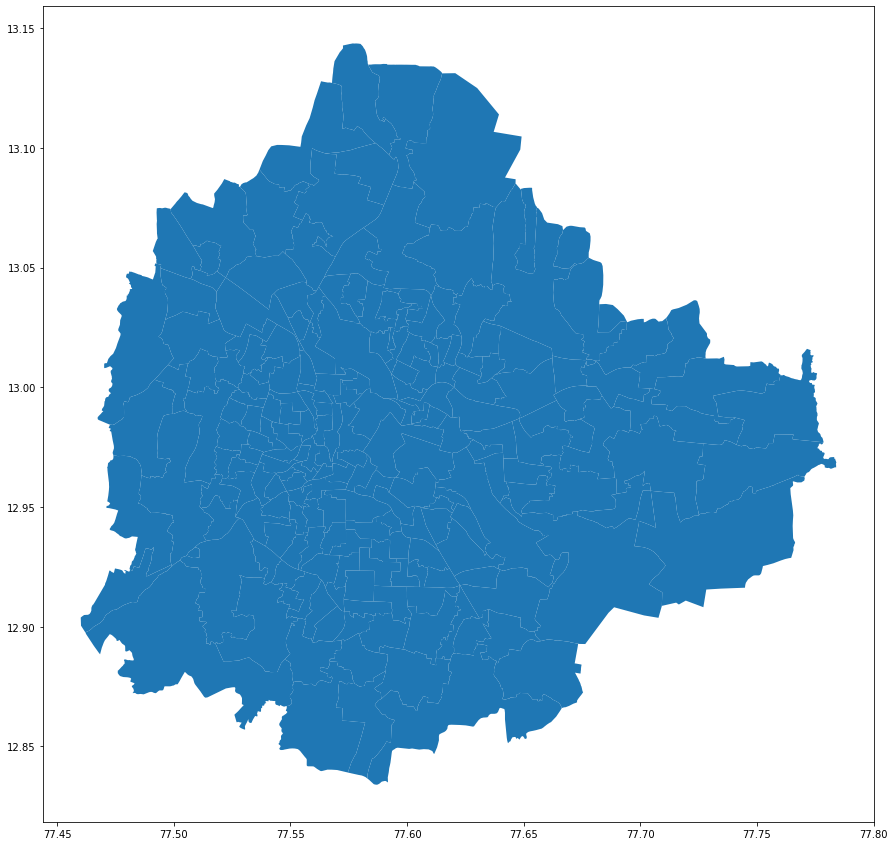

In [3]:
fig  , ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [4]:
path = "./Dataset_CNI/BMTC.parquet.gzip"
path2 = "./Dataset_CNI/GroundTruth.csv"
path3 = "./Dataset_CNI/Input.csv"
df1 = pd.read_parquet(path,engine = 'pyarrow')
crs = {'init':'espg:4326'}

In [5]:
df1.head()

,BusID,Latitude,Longitude,Speed,Timestamp
0,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:02
1,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:12
2,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:22
3,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:32
4,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:42


In [6]:
geometry = [ Point(xy) for xy in zip( df1["Longitude"] , df1["Latitude"])]
geometry[:3]

In [8]:
geo_df = gpd.GeoDataFrame(df1,geometry=geometry)
geo_df.head()

,BusID,Latitude,Longitude,Speed,Timestamp,geometry
0,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:02,POINT (77.44555 13.07456)
1,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:12,POINT (77.44555 13.07456)
2,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:22,POINT (77.44555 13.07456)
3,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:32,POINT (77.44555 13.07456)
4,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:42,POINT (77.44555 13.07456)


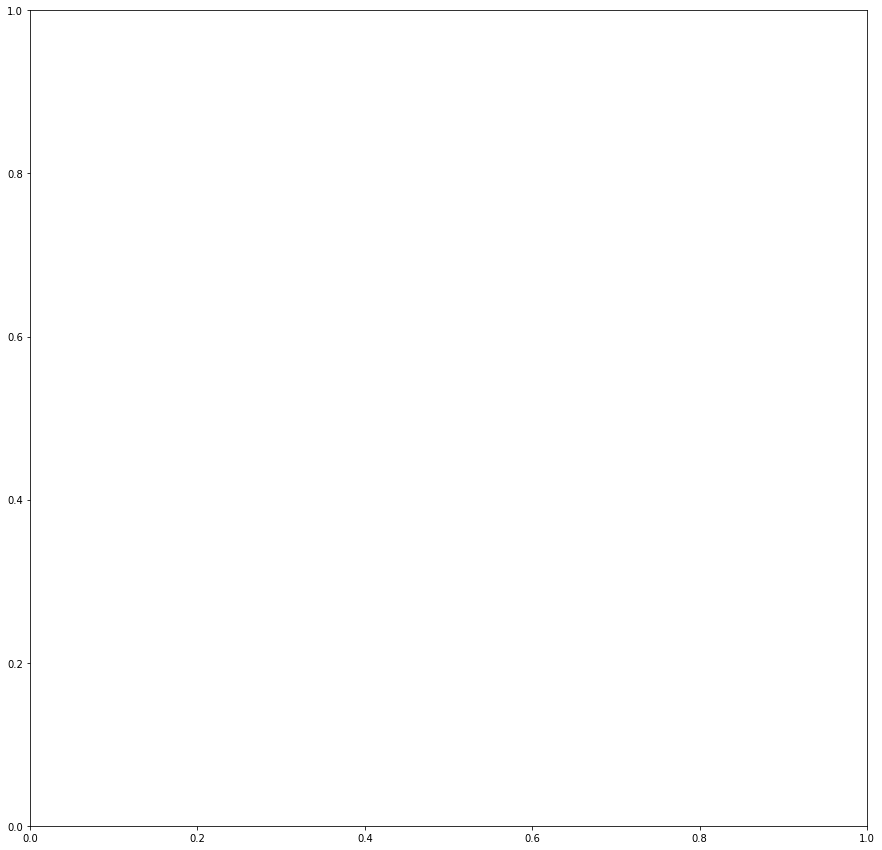

In [15]:
fig_ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax ,alpha = 0.4 , color = 'grey')
geo_df[geo_df["Speed"] == 0.0].plot(ax= ax,markersize = 20 , color = "red" ,marker = "o" ,label = "Stop")
ax.legend(prop= {'size':15})


In [11]:
print(df1["Timestamp"])

0         2019-08-01 07:00:02
1         2019-08-01 07:00:12
2         2019-08-01 07:00:22
3         2019-08-01 07:00:32
4         2019-08-01 07:00:42
                  ...        
6014941   2019-08-01 18:59:20
6014942   2019-08-01 18:59:30
6014943   2019-08-01 18:59:40
6014944   2019-08-01 18:59:50
6014945   2019-08-01 19:00:00
Name: Timestamp, Length: 6014946, dtype: datetime64[ns]
